# Predicting Car Market Prices

In this project, we'll be using k-nearest neighbors to predict the market price of cars. We have information about the technical features of each car from the dataset [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

pd.options.display.max_columns = 99

In [2]:
# Read the file

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 
         'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data',names=cols)

## Data Exploration

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Choosing Columns to keep

We will keep all columns that contain continuous values as described in the dataset's [documentation](https://archive.ics.uci.edu/ml/datasets/automobile).

In [5]:
keep_cols = ['normalized-losses','wheel-base','length','width','height','curb-weight',
            'engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm',
            'city-mpg','highway-mpg','price']

In [6]:
continuous_cars = cars[keep_cols].copy()
continuous_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
continuous_cars = continuous_cars.replace(to_replace='?', value=np.nan)

In [8]:
continuous_cars = continuous_cars.astype(float)

In [9]:
len(continuous_cars[continuous_cars['normalized-losses'].isnull()])

41

In [10]:
continuous_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-ratio  205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


## Data Cleaning

We will drop the normalized-losses column since it has about a fifth of the data missing. We will also drop any rows missing the price data since we are trying to predict the price. For the other columns, we will fill missing values with the mean.

In [11]:
continuous_cars = continuous_cars.drop(columns=['normalized-losses'])

In [12]:
continuous_cars = continuous_cars.dropna(subset=['price'])
continuous_cars = continuous_cars.fillna(continuous_cars.mean())

In [13]:
continuous_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         201 non-null    float64
 1   length             201 non-null    float64
 2   width              201 non-null    float64
 3   height             201 non-null    float64
 4   curb-weight        201 non-null    float64
 5   engine-size        201 non-null    float64
 6   bore               201 non-null    float64
 7   stroke             201 non-null    float64
 8   compression-ratio  201 non-null    float64
 9   horsepower         201 non-null    float64
 10  peak-rpm           201 non-null    float64
 11  city-mpg           201 non-null    float64
 12  highway-mpg        201 non-null    float64
 13  price              201 non-null    float64
dtypes: float64(14)
memory usage: 23.6 KB


## Normalize Data

In order to compare data with different ranges, we'll normalize the numerical data we've kept.

In [14]:
normalized_cars = (continuous_cars - continuous_cars.mean()) / (continuous_cars.std())

normalized_cars['price'] = continuous_cars['price']

In [15]:
normalized_cars.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0
3,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.430252,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,13950.0
4,0.099398,0.194690,0.243137,0.217881,0.518722,0.219617,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,17450.0


## Univariate K-Nearest Neighbors

In [16]:
def knn_train_test(train_col, target_col, df, k=5):
    np.random.seed(1)
    # Randomize the order of the input dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    #Find the row at which we split the dataframe into train and test
    split = int(round(len(df)*0.8,0))
    
    #Split the data
    train = rand_df.iloc[0:split]
    test = rand_df.iloc[split:]
    
    #Istantiate and fit the model, then predict test values
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(train[[train_col]],train[target_col])
    prediction = model.predict(test[[train_col]])
    
    #Compute root mean squared error of test
    rmse = (mean_squared_error(test[target_col],prediction))**0.5
    
    return(rmse)
    


In [17]:
train_cols = normalized_cars.columns.drop('price')
rmses = {}

for col in train_cols:
    rmse = knn_train_test(col,'price',normalized_cars,5)
    rmses[col] = rmse


In [18]:
rmses_series = pd.Series(rmses)
rmses_series.sort_values(inplace=True)

In [19]:
rmses_series

engine-size          3070.028813
curb-weight          3316.148830
city-mpg             3828.302969
highway-mpg          3984.251642
width                4189.451002
wheel-base           4735.628787
horsepower           5098.387771
length               5820.211340
compression-ratio    6157.679671
peak-rpm             6985.713614
stroke               7062.851004
height               7142.493773
bore                 7583.700633
dtype: float64

## Iterating on K

In [20]:
k_vals = [1,3,5,7]

col_rmses = {}
for col in train_cols:
    k_rmses = {}
    for k in k_vals:
        k_rmses[k] = knn_train_test(col,'price',normalized_cars,k)
    col_rmses[col] = k_rmses

In [21]:
print('engine size: ')
print(col_rmses['engine-size'])

print('curb weight: ')
print(col_rmses['curb-weight'])

print('city mpg: ')
print(col_rmses['city-mpg'])


engine size: 
{1: 3818.7331669023433, 3: 3125.493809428804, 5: 3070.028813056972, 7: 3121.128479200027}
curb weight: 
{1: 3187.176928725483, 3: 3249.119977864091, 5: 3316.148829742115, 7: 3429.259924174751}
city mpg: 
{1: 4415.383134564881, 3: 4190.296940883519, 5: 3828.3029694631014, 7: 3559.936920302185}


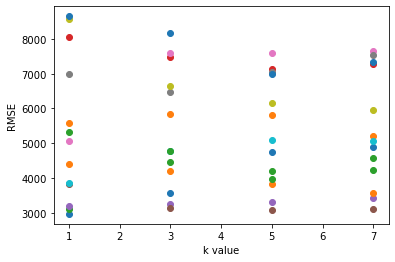

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = []
for k,v in col_rmses.items():
    

    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')


## Multivariate Model

Here we're going to take the best performing features from above and test our model with multiple features. We'll test with 2, 3, 4, and 5 features.

In [23]:
def knn_train_test_multi(train_cols, target_col, df, k=5):
    np.random.seed(1)
    # Randomize the order of the input dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    #Find the row at which we split the dataframe into train and test
    split = int(round(len(df)*0.5,0))
    
    #Split the data
    train = rand_df.iloc[0:split]
    test = rand_df.iloc[split:]
    
    #Istantiate and fit the model, then predict test values
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(train[train_cols],train[target_col])
    prediction = model.predict(test[train_cols])
    
    #Compute root mean squared error of test
    rmse = (mean_squared_error(test[target_col],prediction))**0.5
    
    return(rmse)
    


In [24]:
rmses_multi = {}

for i in range (2,6):
    cols = pd.Series(rmses_series.index[0:i])
    rmses_multi[i] = knn_train_test_multi(cols, 'price', normalized_cars, k=5)

In [25]:
rmses_multi

{2: 3430.242942526444,
 3: 3292.0894714331193,
 4: 3541.702963600454,
 5: 3551.6121378638436}

## Tuning Hyperparameters

In [26]:
rmses_multi_k = {}

for i in range (2,6):
    rmses_k = {}
    for k in range(1,26):

        cols = pd.Series(rmses_series.index[0:i])
        rmses_k[k] = knn_train_test_multi(cols, 'price', normalized_cars, k)
    rmses_multi_k['{} best features'.format(i)] = rmses_k

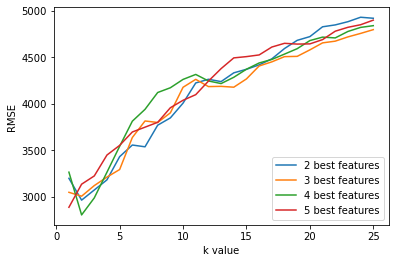

In [27]:

labels = []
for k,v in rmses_multi_k.items():
    
    labels.append(k)
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.legend(labels,loc='lower right')

## Conclusions

We saw consistently in this project that a low k-value provided better predictions than high k-values. This could be because of the limited scope of our dataset - with just 201 cars in our database, we are unlikely to have a large number of similar cars to each given car. With more data, we might see that a higher k-value increases the accuracy of the model.